In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/aamirpirani/Desktop/Viz For Social Good/UN World Data Forum/Data/Entradas_de_extranjeros_a_Colombia_20241025.csv')

In [3]:
print(df.head())

    Año    Mes             Nacionalidad  Codigo Iso 3166  Femenino  Masculino  \
0  2012  Enero  Islas Alboran y Perejil            99999         1          0   
1  2012  Enero                  Albania                8         1          2   
2  2012  Enero                 Alemania              276        11         16   
3  2012  Enero                 Alemania              276         1          1   
4  2012  Enero                 Alemania              276        63        102   

   Indefinido  Total      Latitud - Longitud  
0         NaN      1   (4.697144,-74.140516)  
1         NaN      3   (4.697144,-74.140516)  
2         NaN     27  (-4.197703,-69.941278)  
3         NaN      2    (0.25129,-76.875963)  
4         NaN    165   (0.814836,-77.662532)  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135040 entries, 0 to 135039
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Año                 135040 non-null  int64  
 1   Mes                 135040 non-null  object 
 2   Nacionalidad        135040 non-null  object 
 3   Codigo Iso 3166     135040 non-null  int64  
 4   Femenino            135040 non-null  int64  
 5   Masculino           135040 non-null  int64  
 6   Indefinido          0 non-null       float64
 7   Total               135040 non-null  int64  
 8   Latitud - Longitud  135040 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 9.3+ MB
None


In [5]:
print(df.describe())

                 Año  Codigo Iso 3166       Femenino      Masculino  \
count  135040.000000    135040.000000  135040.000000  135040.000000   
mean     2017.200096      1181.567195      93.862789     130.103814   
std         3.348798      8637.454454     679.580759     872.534538   
min      2012.000000         0.000000       0.000000       0.000000   
25%      2014.000000       208.000000       0.000000       1.000000   
50%      2017.000000       392.000000       2.000000       3.000000   
75%      2020.000000       643.000000       9.000000      17.000000   
max      2023.000000     99999.000000   39500.000000   48041.000000   

       Indefinido          Total  
count         0.0  135040.000000  
mean          NaN     223.977022  
std           NaN    1536.541134  
min           NaN       1.000000  
25%           NaN       2.000000  
50%           NaN       5.000000  
75%           NaN      26.000000  
max           NaN   82609.000000  


In [6]:
print(df.isnull().sum())

Año                        0
Mes                        0
Nacionalidad               0
Codigo Iso 3166            0
Femenino                   0
Masculino                  0
Indefinido            135040
Total                      0
Latitud - Longitud         0
dtype: int64


In [7]:
print(df.duplicated().sum())

45


In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

        Año        Mes                                     Nacionalidad  \
175    2012      Enero                                           España   
332    2012      Enero                                           España   
786    2012      Enero                              Federación de Rusia   
886    2012      Enero                              Federación de Rusia   
962    2012      Enero  Reino Unido de Gran Bretaña e Irlanda del Norte   
...     ...        ...                                              ...   
21552  2013    Octubre  Reino Unido de Gran Bretaña e Irlanda del Norte   
23386  2013  Diciembre                              Federación de Rusia   
23512  2013  Diciembre                              Federación de Rusia   
34220  2014  Diciembre                                     Países Bajos   
35251  2014  Diciembre                                     Países Bajos   

       Codigo Iso 3166  Femenino  Masculino  Indefinido  Total  \
175                724         0 

In [9]:
df['Femenino'].fillna(0, inplace=True)
df['Masculino'].fillna(0, inplace=True)
df['Total'].fillna(df['Femenino'] + df['Masculino'], inplace=True)

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_1397/526265896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Femenino'].fillna(0, inplace=True)
/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_1397/526265896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [10]:
df[['latitud', 'longitud']] = df['Latitud - Longitud'].str.extract(r'\(([^,]+),([^)]+)\)').astype(float)

In [11]:
df['Indefinido'].fillna(0, inplace=True)
df['Total'].fillna(df['Indefinido'], inplace=True)

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_1397/3013232908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Indefinido'].fillna(0, inplace=True)
/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_1397/3013232908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

## Nationality

In [12]:
nationality_summary = df.groupby('Nacionalidad')['Total'].sum().sort_values(ascending=False)
print(nationality_summary)

Nacionalidad
Estados Unidos de América                               6070002
Venezuela                                               5895971
México                                                  1696774
Ecuador                                                 1680447
Perú                                                    1487217
                                                         ...   
Islas Pitcairn/Territorio Británico de Ultramar               1
Papúa Occidental                                              1
Polinesia Francesa/Colectividad de Ultramar Francesa          1
Reunión                                                       1
Sudán del Sur                                                 1
Name: Total, Length: 241, dtype: int64


In [13]:
top_nationalities = df.groupby('Nacionalidad')['Total'].sum().sort_values(ascending=False).head(10)
print(top_nationalities)

Nacionalidad
Estados Unidos de América    6070002
Venezuela                    5895971
México                       1696774
Ecuador                      1680447
Perú                         1487217
Brasil                       1478807
Argentina                    1465090
España                       1256465
Chile                        1244837
Panamá                        893705
Name: Total, dtype: int64


<Axes: title={'center': 'Top 10 Nationalities Entering Colombia'}, xlabel='Nacionalidad'>

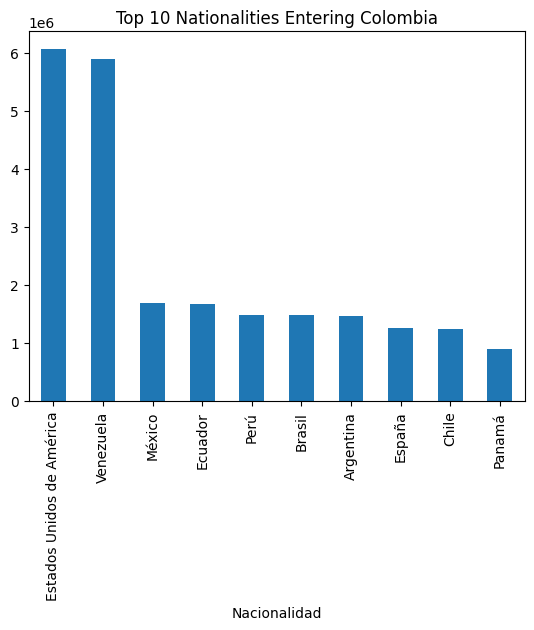

In [14]:
top_nationalities.plot(kind='bar', title='Top 10 Nationalities Entering Colombia')

## Gender Trend

In [15]:
gender_trend = df.groupby(['Año', 'Mes', 'Nacionalidad'])[['Femenino', 'Masculino', 'Indefinido']].sum().reset_index()
print(gender_trend)

        Año    Mes       Nacionalidad  Femenino  Masculino  Indefinido
0      2012  Abril            Albania         3          4         0.0
1      2012  Abril           Alemania       943       1748         0.0
2      2012  Abril            Andorra         1          7         0.0
3      2012  Abril             Angola         0          2         0.0
4      2012  Abril  Antigua y Barbuda         2          2         0.0
...     ...    ...                ...       ...        ...         ...
21357  2023   Mayo         Uzbekistán         6          7         0.0
21358  2023   Mayo          Venezuela     17760      16125         0.0
21359  2023   Mayo            Vietnam        16         67         0.0
21360  2023   Mayo             Zambia         3          1         0.0
21361  2023   Mayo           Zimbabue         3          0         0.0

[21362 rows x 6 columns]


In [16]:
# Calculate total entries by gender
df['femenino'] = pd.to_numeric(df['Femenino'], errors='coerce').fillna(0)
df['masculino'] = pd.to_numeric(df['Masculino'], errors='coerce').fillna(0)
df['indefinido'] = pd.to_numeric(df['Indefinido'], errors='coerce').fillna(0)

# Aggregate entries by gender
gender_summary = df[['Femenino', 'Masculino', 'Indefinido']].sum()
print("Gender-based Entry Summary:")
print(gender_summary)

Gender-based Entry Summary:
Femenino      12675231.0
Masculino     17569219.0
Indefinido           0.0
dtype: float64


## Time Series

In [17]:
# Spanish-to-English month translation dictionary
month_translation = {
    "Enero": "January", "Febrero": "February", "Marzo": "March",
    "Abril": "April", "Mayo": "May", "Junio": "June",
    "Julio": "July", "Agosto": "August", "Septiembre": "September",
    "Octubre": "October", "Noviembre": "November", "Diciembre": "December"
}

In [18]:
df['Mes_English'] = df['Mes'].map(month_translation)

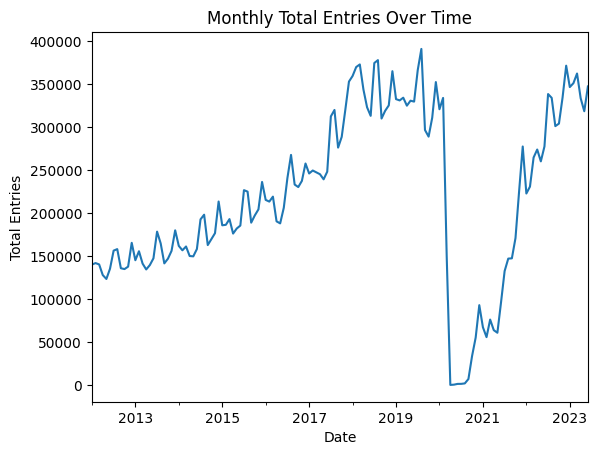

In [19]:
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes_English'], format='%Y-%B')

# Plot monthly trends in entries over time (optional visualization code)
import matplotlib.pyplot as plt

df.groupby('Fecha')['Total'].sum().plot(title="Monthly Total Entries Over Time")
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.show()

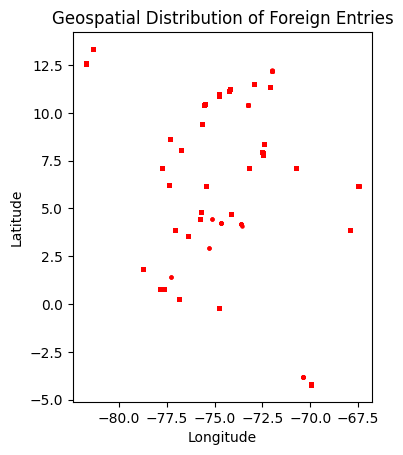

In [20]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitud'], df['latitud'])
)

gdf.plot(marker='o', color='red', markersize=5)
plt.title("Geospatial Distribution of Foreign Entries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()